<a href="https://colab.research.google.com/github/alexquar/Pytorch-Learning/blob/main/simpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#imports
import torch as pt
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
#class inherited from nn
class Model(nn.Module):
  #Input layer (flower features) -->
  #layer1 -->
  #layer 2 -->
  #so on...
  #output layer
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3 ):
      super().__init__()
      #layer 1
      self.fc1 = nn.Linear(in_features, h1)
      #layer 2
      self.fc2 = nn.Linear(h1,h2)
      #output layer
      self.out = nn.Linear(h2, out_features)
  def forward(self ,x ):
    #function pushes through all layers and returns output
    #relu is a pt function that basically says if something is less than 0 let it be 0 in short
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x


In [21]:
#creates seed for randoms
pt.manual_seed(41)
#instance of model
model =  Model()

In [22]:
%matplotlib inline
#data set url
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
#load pandas data frame
full_df = pd.read_csv(url)
#swap types with numbers for efficiency
full_df['species'] = full_df['species'].replace('setosa',0.0).replace('versicolor', 1.0).replace('virginica',2.0)


full_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [23]:
#training and testing

#drop species column and also get a species column
partial_df = full_df.drop('species', axis=1)
species_df = full_df['species']

#convert to numpy arr
X = partial_df.values
Y = species_df.values

#get training set, test set, labels determine how much for each via test_size and set a base random
#basically splits all our data to test and training sets with test and train answers
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.2,random_state=42)


#converts our data and answers for test and train to tensors with are easier to work with for NN

#convert X to tensors
X_train = pt.FloatTensor(X_train)
X_test = pt.FloatTensor(X_test)

#convert Y to tensors
Y_train = pt.LongTensor(Y_train)
Y_test = pt.LongTensor(Y_test)


In [24]:
#set the criterion of model to measure the error, how far our predictions are from expected result

#we will use this method for this nn
criterion = nn.CrossEntropyLoss()

#choose optimizer and learning rate, this one will use Adam. lr is if error rate does not go down after iterations then the lr might need to be lowered, the lower the lr the longer training time will be
optimizer = pt.optim.Adam(model.parameters(), lr=0.01) #parameters are just the things we set on our model ie our layers, 1,2,out


In [25]:
#run iterations and trck error
iterations = 100
losses = []
for i in range(iterations):
  Y_pred = model.forward(X_train) #send forward training data

  #measure error, will be high originally, test results against correct answers based on criterion method we chose
  loss = criterion(Y_pred, Y_train)

  #add to our losses to track improvement
  losses.append(loss.detach().numpy())

  #print loss every ten iterations to check progress
  if i%10 == 0:
    print(f'iteration:{i}, loss:{loss}')

  #back propegation: as you get error rates you feed it back into the model for the next iteration so that weights can be adjusted accordingly to fine tune
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

iteration:0, loss:1.125285267829895
iteration:10, loss:1.0188318490982056
iteration:20, loss:0.8338496685028076
iteration:30, loss:0.6025498509407043
iteration:40, loss:0.41379642486572266
iteration:50, loss:0.28254783153533936
iteration:60, loss:0.19306634366512299
iteration:70, loss:0.13670380413532257
iteration:80, loss:0.10248851776123047
iteration:90, loss:0.08341799676418304


Text(0.5, 0, 'iteration')

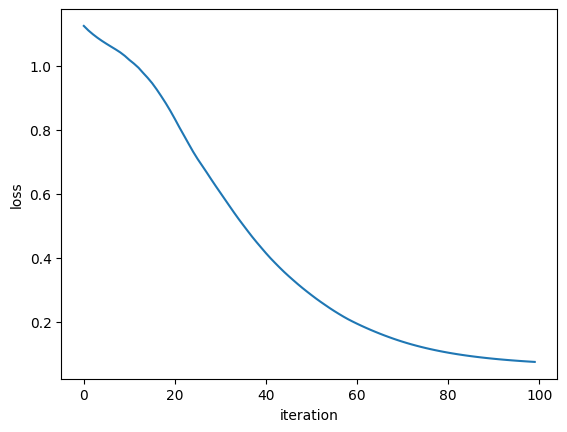

In [26]:
#graph error, goes through range of iterations and matches that with loss in our list
plt.plot(range(iterations), losses)
plt.ylabel("loss")
plt.xlabel("iteration")